In [1]:
# Import libraries
import pandas as pd 
import psycopg2 
import numpy as np
import sklearn as sk
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import S4fcns as S4
import string
import webbrowser

# Visualization tools

Example usage on document 'd7pp4q-027':

1) Color a document based on confidence of the text:

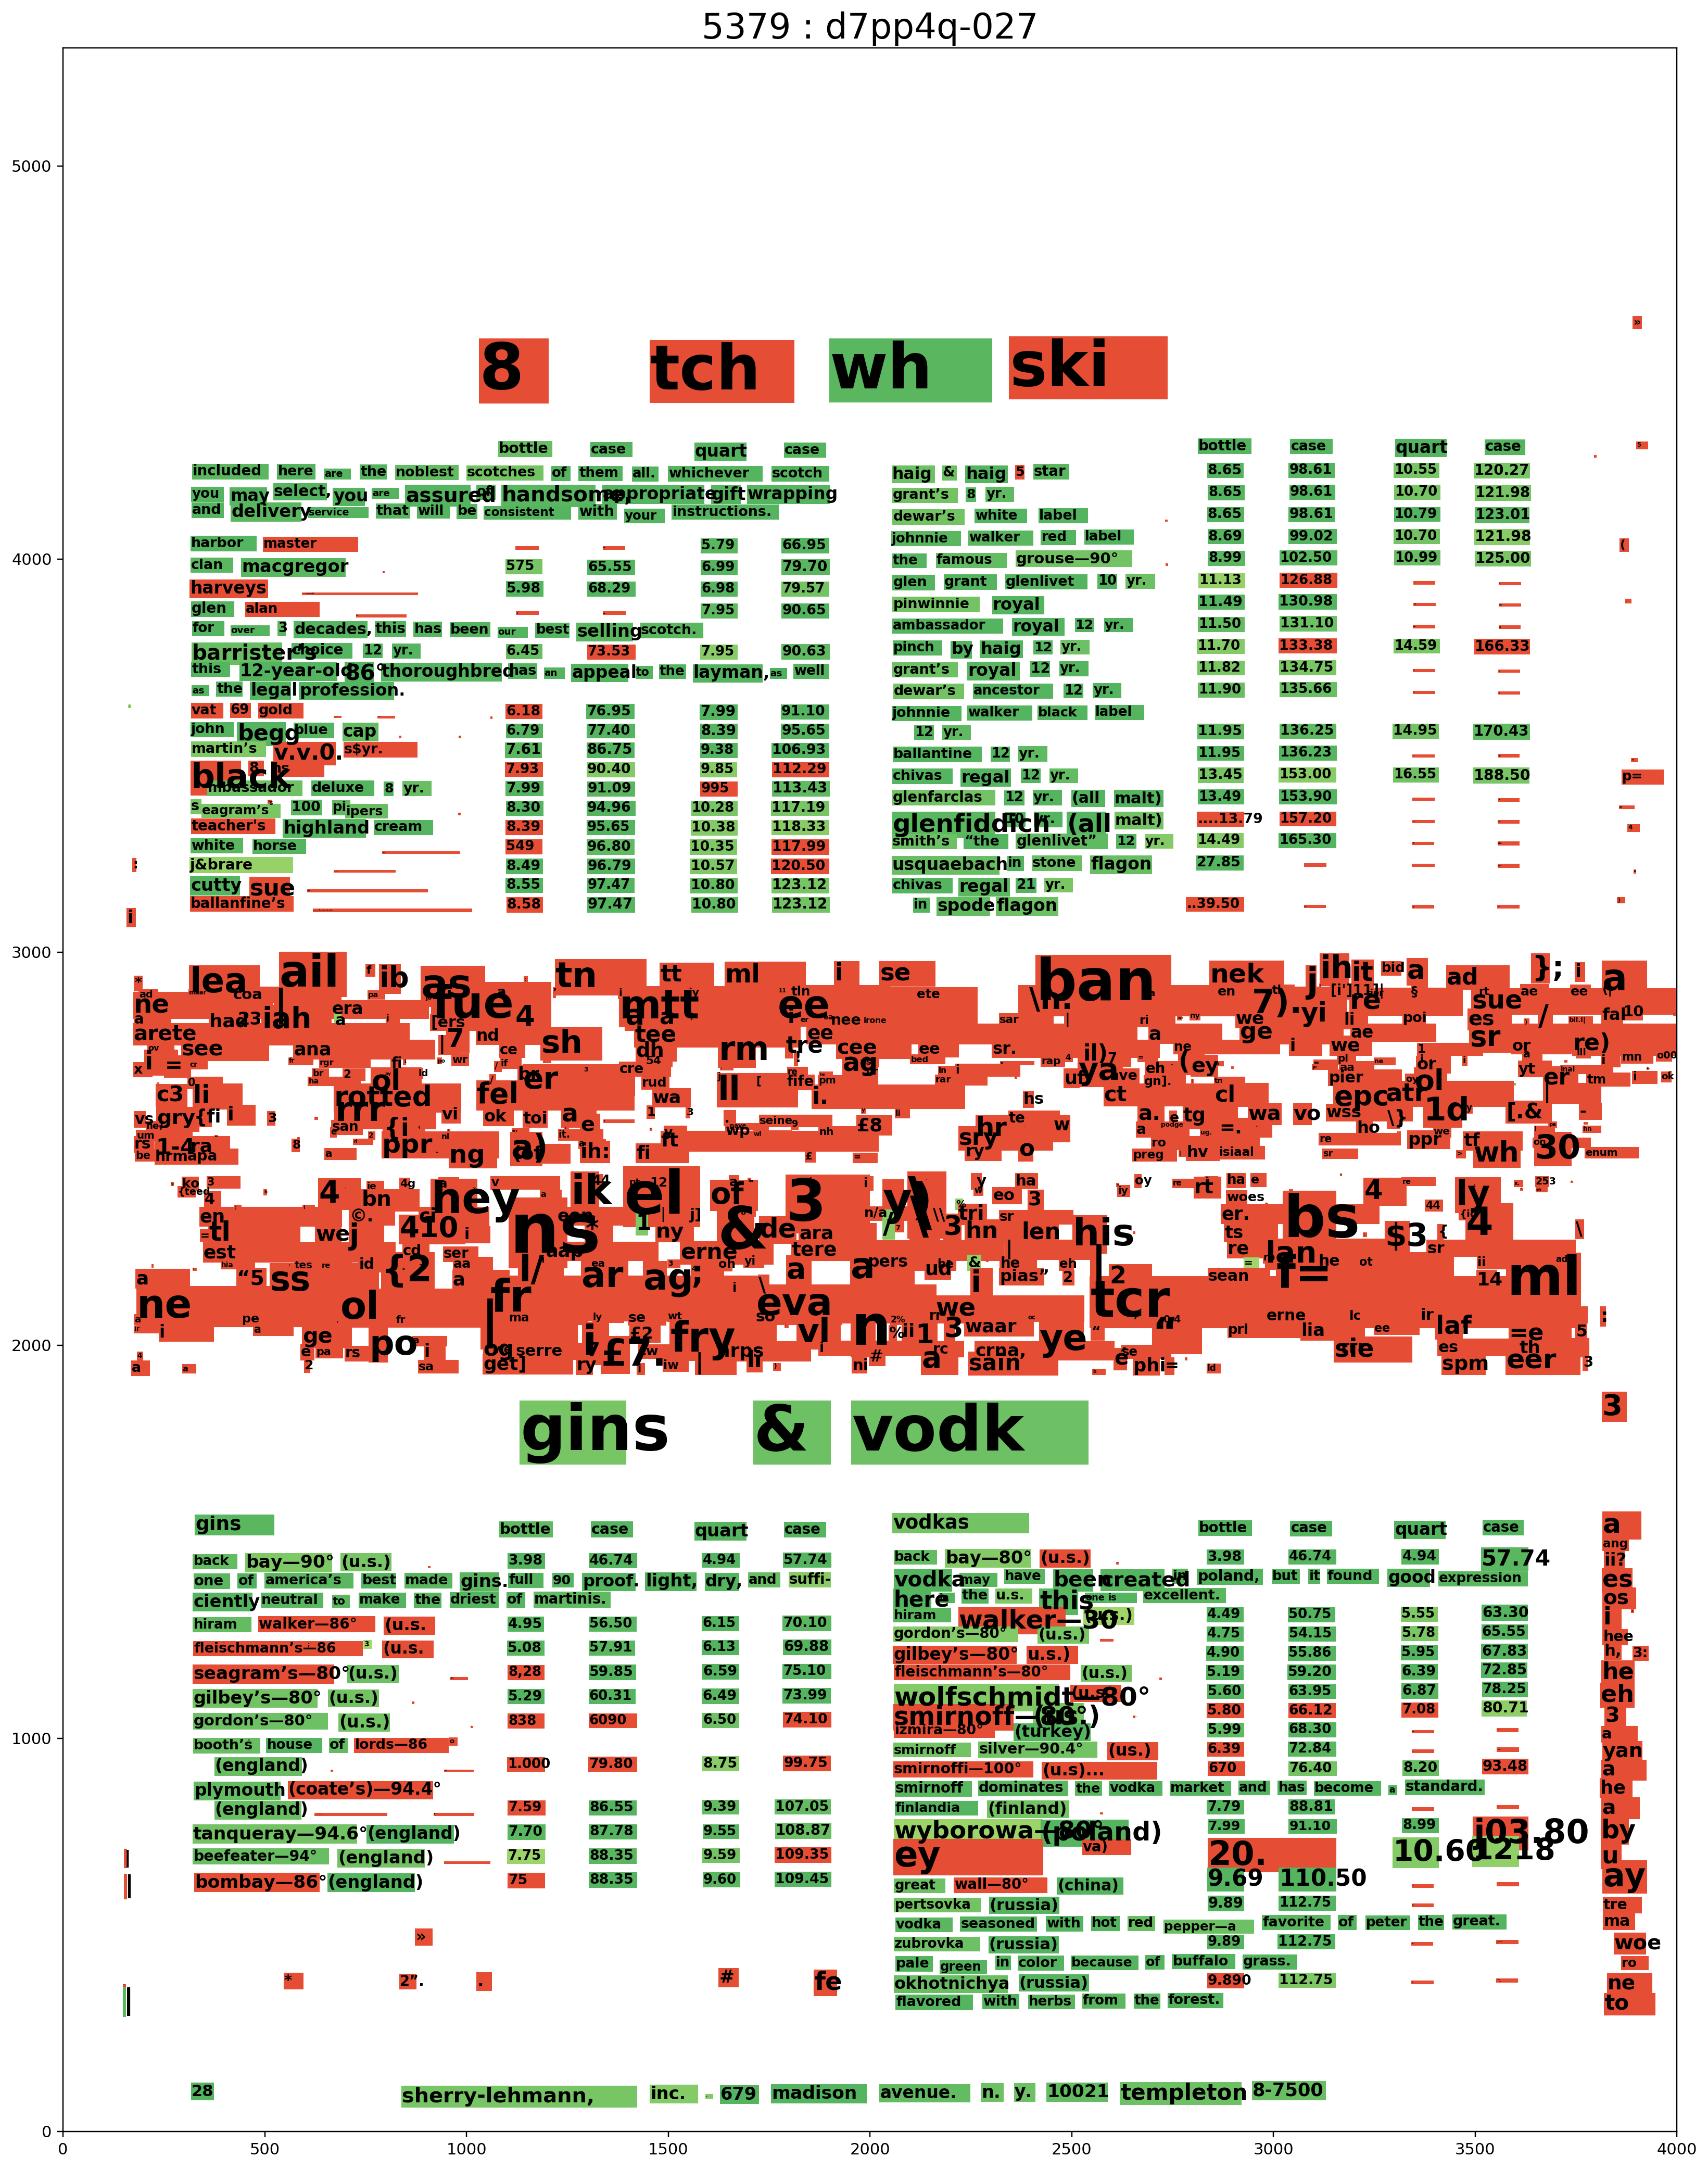

In [2]:
S4.colorDoc('d7pp4q-027', colorBy='text_confidence')

2) Run the cell below to open the orignal document:

In [4]:
link = S4.getDocLink(document = 'd7pp4q-027')
webbrowser.open(link)

True

## Model testing:

To test the word embedding model, we'll use document 'd7jg65-006'. 
* We'll color code the document according to its similary to *champagne*.
* Next, we'll color code the document according to its similary to *wine*.

To open the original document run the cell below:

In [8]:
documentName = 'd7jg65-006'
link= S4.getDocLink(documentName)
print(link)
# webbrowser.open(link)

https://digital.ucdavis.edu/collection/sherry-lehmann/D-202/d7jg65/media/images/d7jg65-006.jpg


Once we have a trained gensim word2vec model we: 

1) Determined the word similary *scores* for each unique word in the document to the target word (i.e. champagne) in the form of a lookup table. 

2) Iteratively, looked up the similarity for each word of the preprocessed document (orderedScores).

3) Scaled the similiarity scores in a range of 0 to 100, which served as indecies to color the document (orderedColorIdxs). 

4) Colored the document according to it similarity to the target word. 


In [17]:
# 1) Champagne similariy lookup table for the document:
scores = pd.read_csv('./Champagne_sim.csv')

In [18]:
# 2) Iteratively, looked up the similarity for each word of the preprocessed document.
preprocessed_texts = S4.preprocessText(documentName)
orderedScores = S4.orderScores(preprocessed_texts, scores)

In [19]:
# 3) Scaled the similiarity scores in a range of 0 to 100
orderedColorIdxs = S4.getColorIdx(orderedScores)

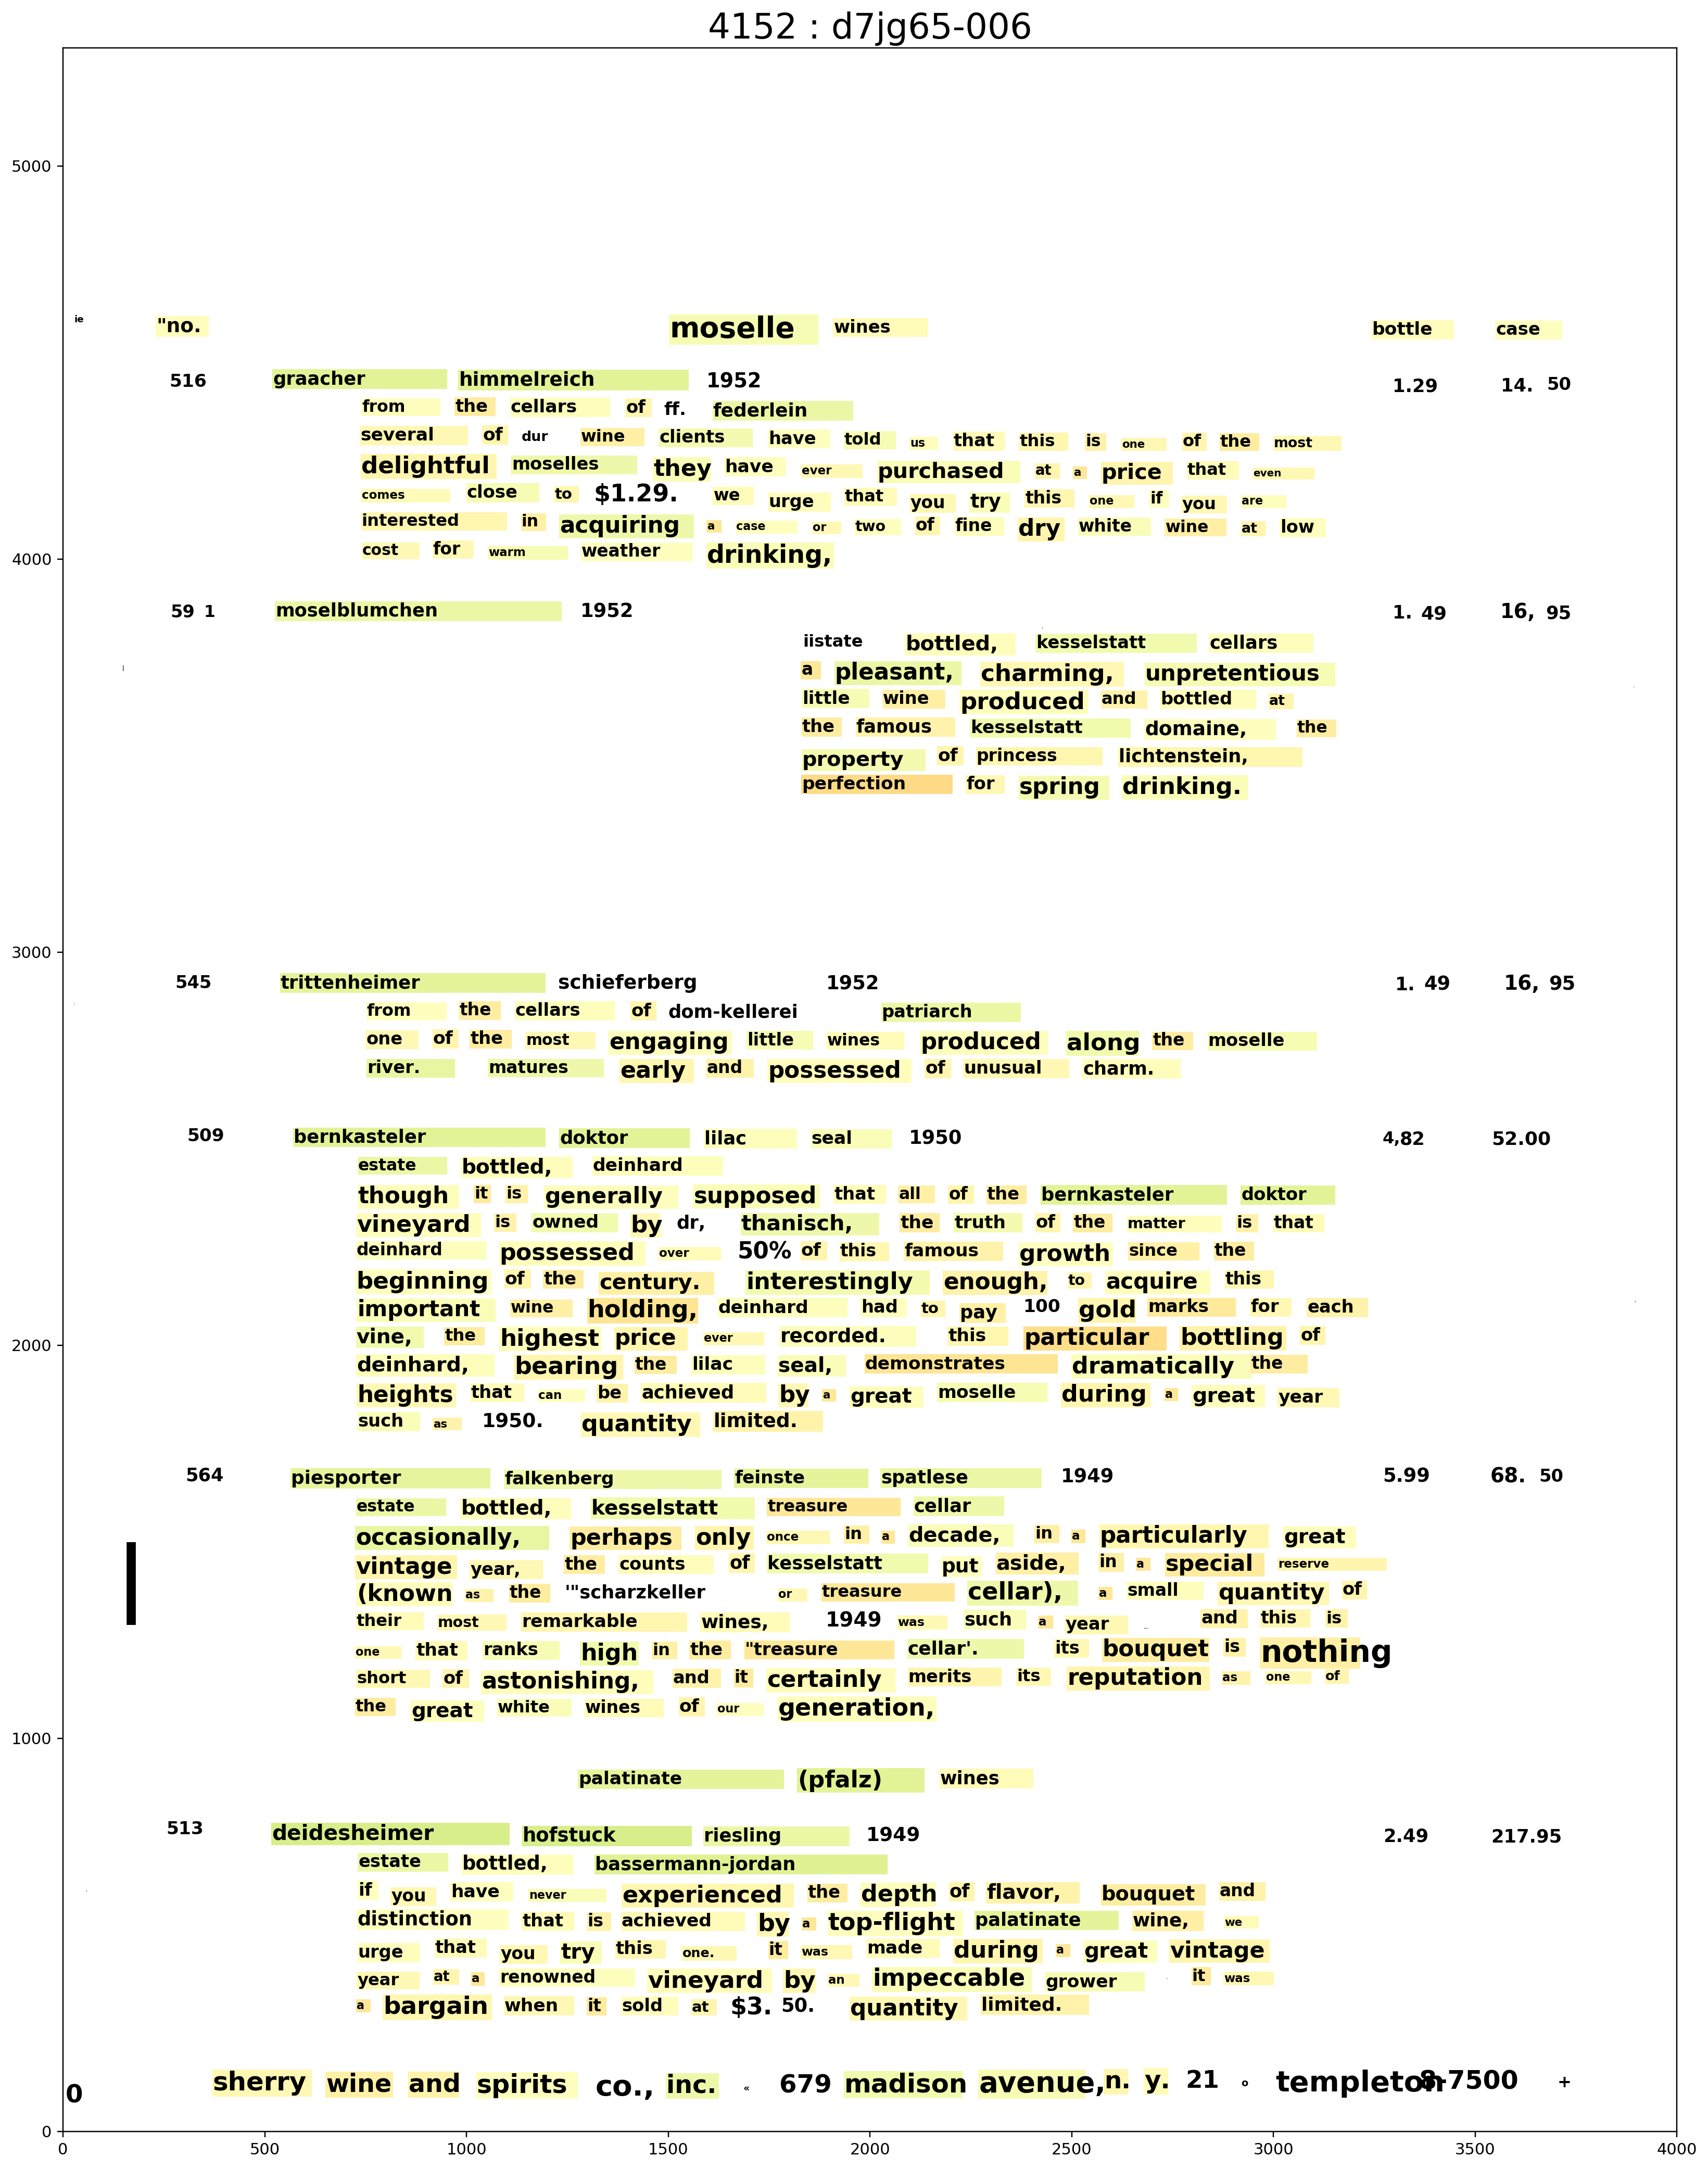

In [20]:
# 4) Color document according to similarity to target (i.e. champagne):
S4.colorDoc(document= documentName,colorLabels = orderedColorIdxs)

The more green the document, the more similar it is to 'champagne'. 
Some words and numbers were not trained, and so they were not colored in.

We next, colored in the document in a similar way below:

In [21]:
# 1) Champagne similariy lookup table for the document:
scores = pd.read_csv('./wine_sim.csv')

Steps 2 and 3 could be combined by creating a function that intakes the ordered preprocessed text from the document, looks up the similiary scores to the target word, and rescales it to get the ordered color indecies:

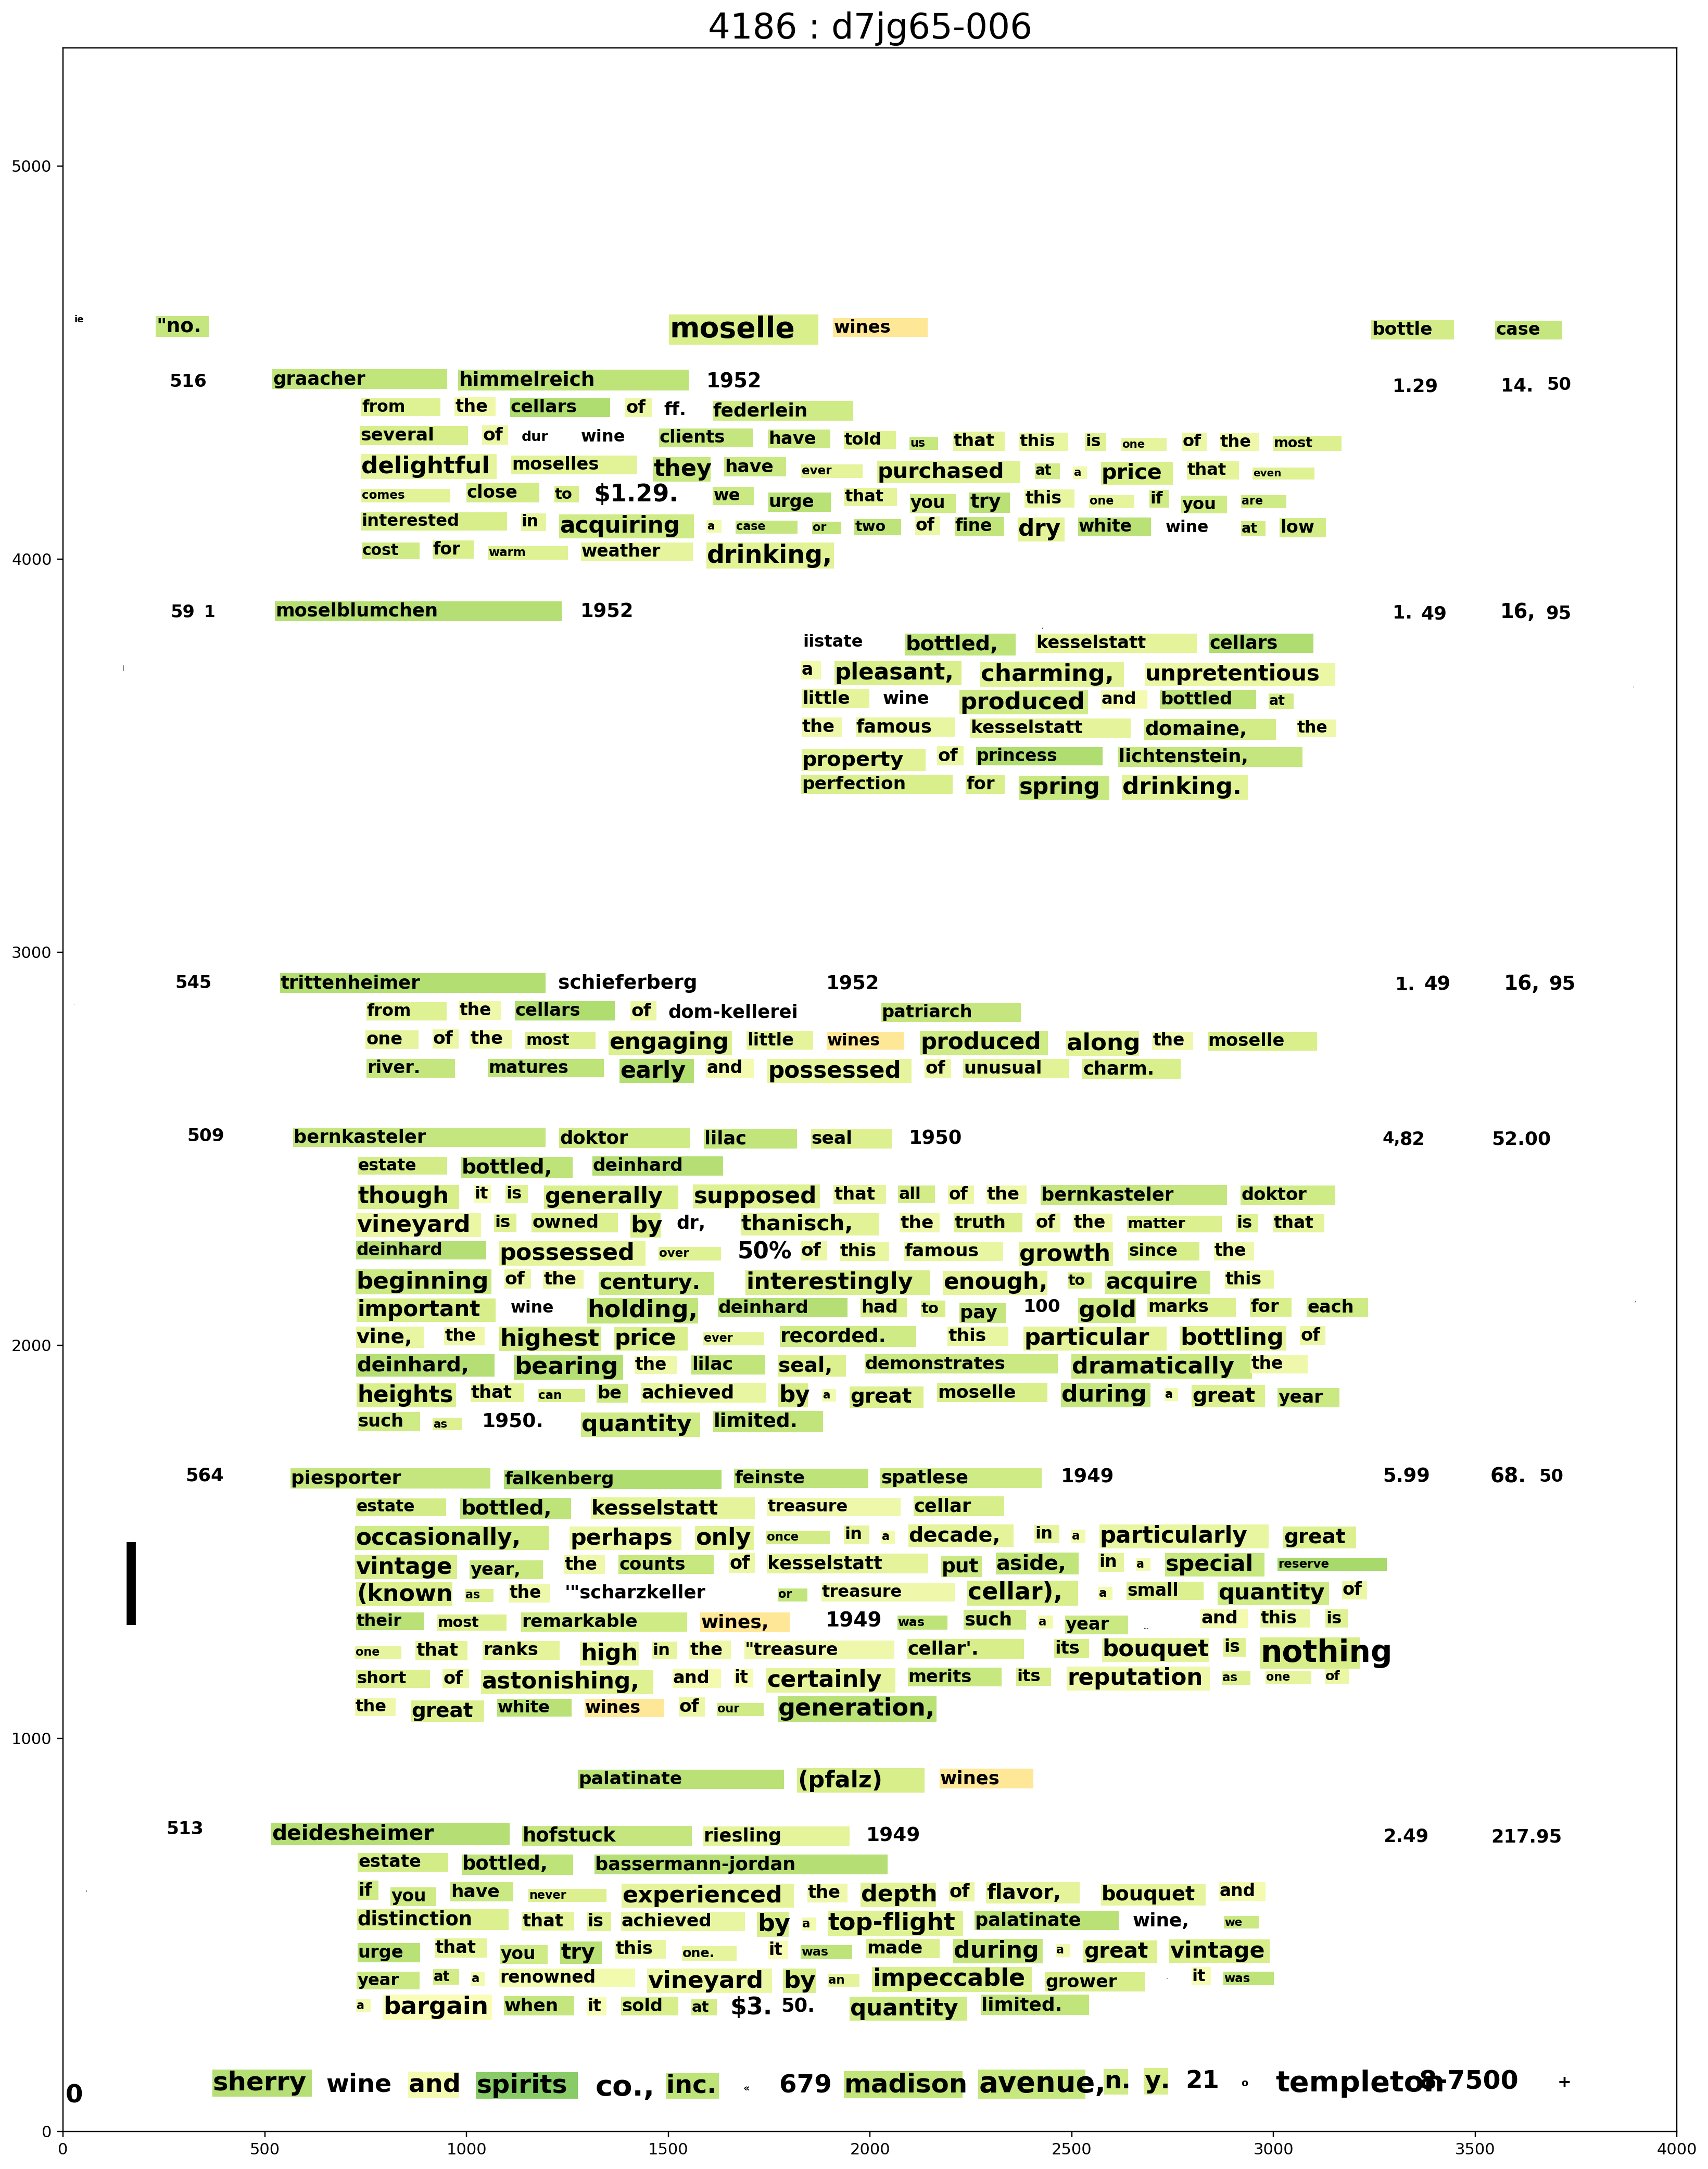

d7jg65-006


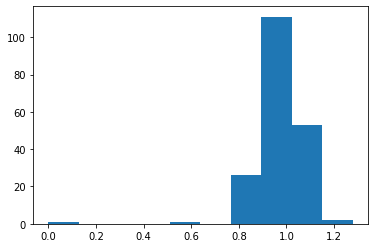

In [15]:
# 2/3) Iteratively, looked up the similarity for each word of the preprocessed document.
# And scaled the similiarity scores in a range of 0 to 100.
preprocessed_texts = S4.preprocessText(documentName)
orderedColorIdxs = S4.getOrderedColorIdx(preprocessed_texts, scores)
# 4) Color document according to similarity to target (i.e. champagne):
S4.colorDoc(document= documentName,colorLabels = orderedColorIdxs)